In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [8]:

import pandas as pd
df = pd.read_csv("/content/Breast_cancer_data (1).csv")
df.head()



,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
summary_statistics = df.describe()
summary_statistics


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [10]:
cols = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']

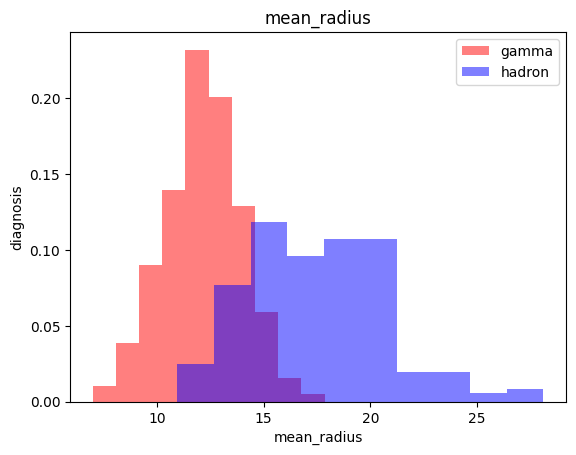

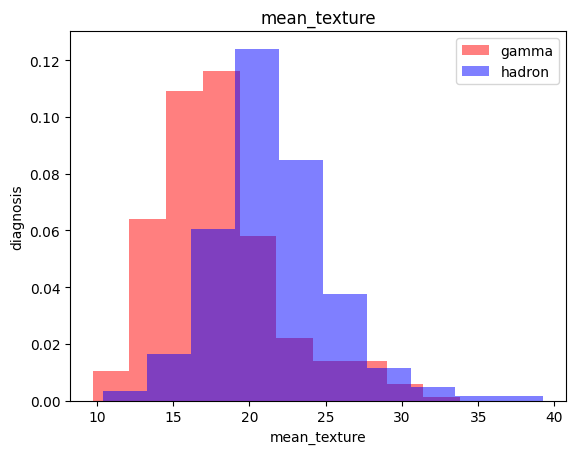

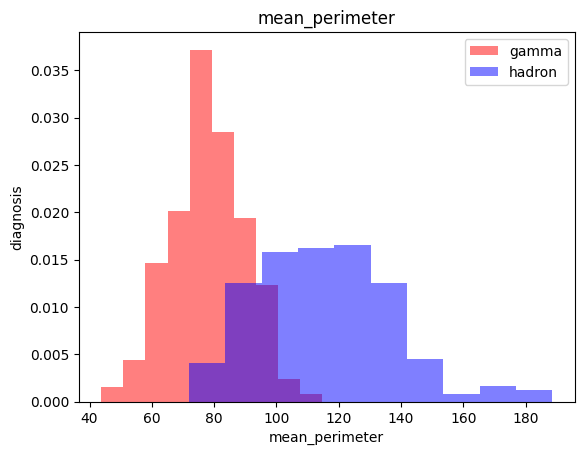

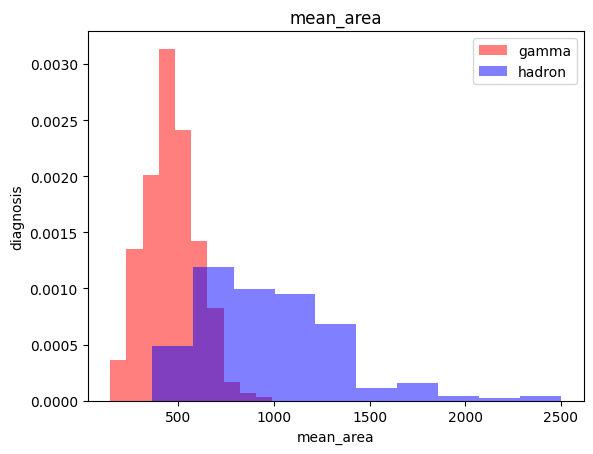

In [11]:
for label in cols[:-1]:
    plt.hist(df[df['diagnosis'] == 1][label],color = 'red',label = 'gamma',alpha = 0.5,density = True)
    plt.hist(df[df['diagnosis'] == 0][label],color = 'blue',label = 'hadron',alpha = 0.5,density = True)
    plt.title(label)
    plt.ylabel("diagnosis")
    plt.xlabel(label)
    plt.legend()
    plt.show()


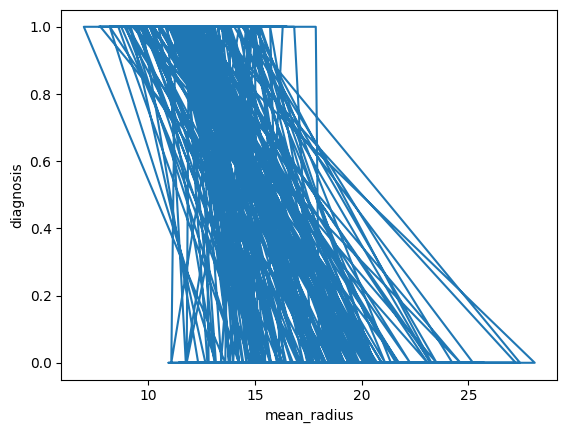

In [12]:
x2 = df['mean_radius']
y1 = df['diagnosis']
import matplotlib .pyplot as plt
plt.xlabel('mean_radius')
plt.ylabel('diagnosis')
plt.plot(x2,y1)
plt.show()

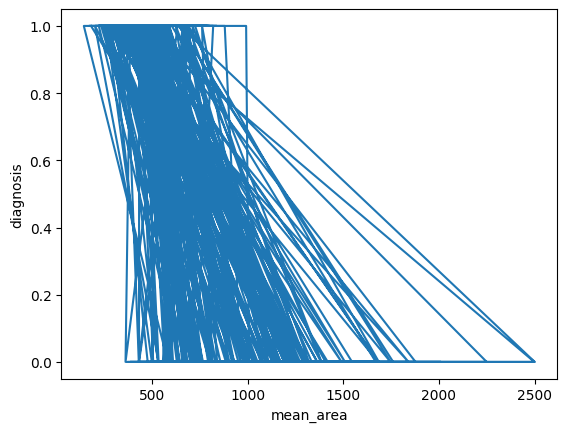

In [13]:
x2 = df['mean_area']
y2 = df['diagnosis']
import matplotlib .pyplot as plt
plt.xlabel('mean_area')
plt.ylabel('diagnosis')
plt.plot(x2,y2)
plt.show()

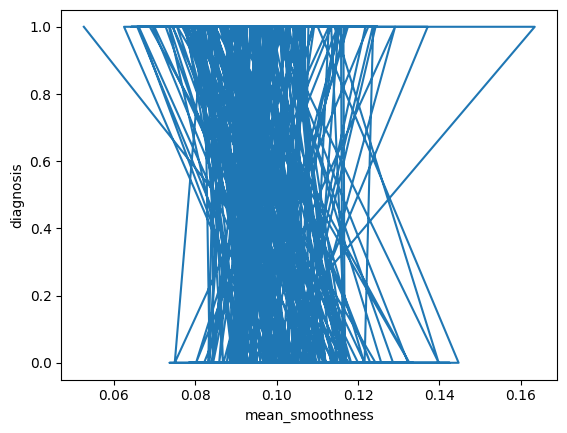

In [14]:
x2 = df['mean_smoothness']
y3= df['diagnosis']
import matplotlib .pyplot as plt
plt.xlabel('mean_smoothness')
plt.ylabel('diagnosis')
plt.plot(x2,y3)
plt.show()

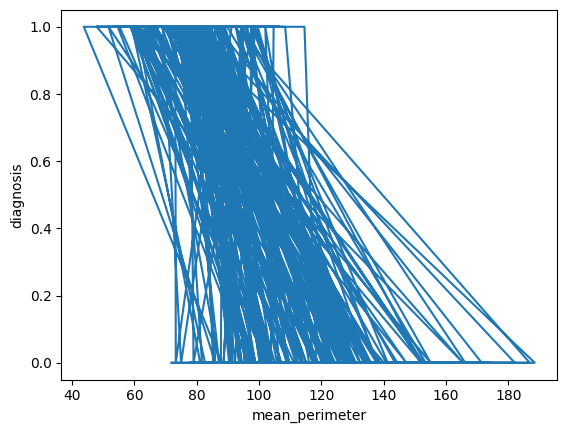

In [15]:
x2 = df['mean_perimeter']
y3= df['diagnosis']
import matplotlib .pyplot as plt
plt.xlabel('mean_perimeter')
plt.ylabel('diagnosis')
plt.plot(x2,y3)
plt.show()

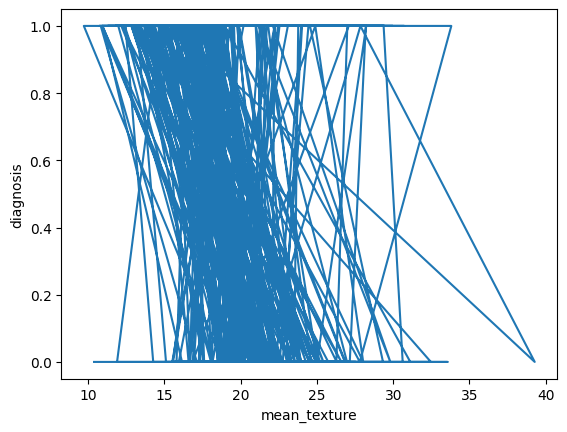

In [16]:
x2 = df['mean_texture']
y3= df['diagnosis']
import matplotlib .pyplot as plt
plt.xlabel('mean_texture')
plt.ylabel('diagnosis')
plt.plot(x2,y3)
plt.show()

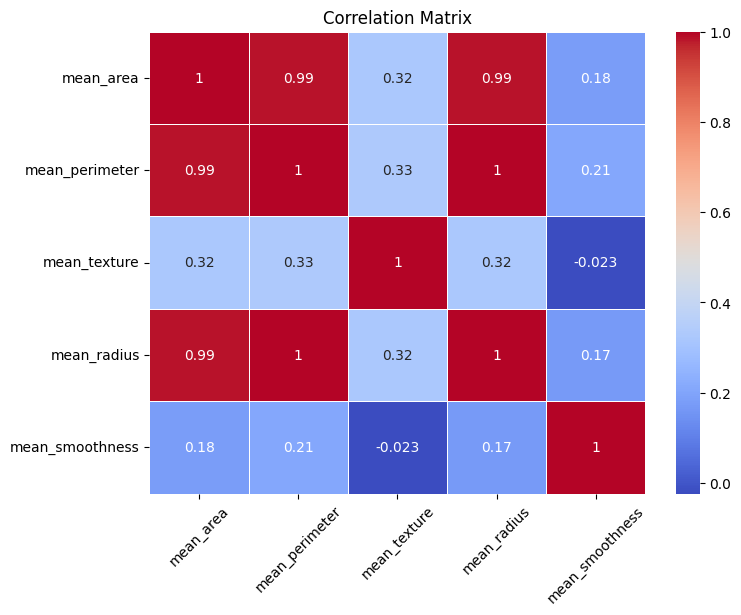

In [17]:
data_variables = df.drop(columns = 'diagnosis',axis = 1)
df_var= pd.DataFrame(data_variables, columns = ['mean_area','mean_perimeter','mean_texture','mean_radius','mean_smoothness'])
correlation_matrix = df_var.corr()
# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [18]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [19]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [20]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [21]:
print(train)

[[ 1.8041154   2.01974788  1.75054273  1.83769464 -0.28850585  0.        ]
 [ 0.35930784  0.04974711  0.38701086  0.24330283  1.01310305  0.        ]
 [-1.26660135 -0.53912467 -1.24755945 -1.03953794  0.60658125  1.        ]
 ...
 [ 0.19050854 -0.61480297  0.2594143   0.05760275  1.53049443  0.        ]
 [ 1.78408837  0.5936849   1.7255238   1.76498075 -0.29515802  0.        ]
 [ 1.10889117  0.60787458  1.04167295  1.01267169 -1.61007127  0.        ]]


In [22]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

426
426
114
114


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
yp=[]
 #implementing perceptron model
def perceptron(w,x1,b):
  q=0
  for i in range(len(x1)):
    for j in range(len(w)):
      s=(x1[i][j]*w[j])+b
      s2=1/(1+np.exp(-s))
      if(s2>=0.5):
        yp.append(1)
      else:
        yp.append(0)
    q=q+1
  print(q)
  return yp
w=[]
#print("enter weights w : ")
w=[0.3,0.2,0.6,0.1,0.2]
b=1
perceptron(w,X_train,b)


426


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [24]:
# Assuming you have the true labels for your data
# Assuming you have the true labels for your data
#true_labels = [1, 0, 1]  # Replace with your actual true labels

# Calculate accuracy
predictions = sum(1 for y_test, yp in zip(y_test, yp) if y_test == yp)
total_predictions = len(y_test)
accuracy = predictions / total_predictions

print("Accuracy:" ,accuracy)



Accuracy: 0.631578947368421


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
yp=[]
 #implementing perceptron model

def perceptron(w,x1,b):
    q=0
    for i in range(len(x1)):
       for j in range(len(w)):
          s=(x1[i][j]*w[j])+b
          s2=1/(1+np.exp(-s))
          if(s2>=0.5):
             yp.append(1)
          else:
             yp.append(0)
    q=q+1
    return yp
accuracy_list = []
#print("enter weights w : ")
num_iter = 8
import random
for i in range(num_iter):
    w = []
    yp=[]
    for j in range(10):
        val = random.uniform(0.0,1.0)
        w.append(val)
    #print(w)
    b = random.uniform(0.0,1.0)
    yp = perceptron(w,X_train,b)
    print(yp)
    predictions = sum(1 for y_test, yp in zip(y_test, yp) if y_test == yp)
    total_predictions = len(y_test)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [31]:
import numpy as np
import random

# Set a random seed for reproducibility
random.seed(0)
np.random.seed(0)

# Generate random data for testing
X_train, y_train = np.random.rand(100, 10), np.random.randint(0, 2, 100)
X_test, y_test = np.random.rand(50, 10), np.random.randint(0, 2, 50)

# Implementing perceptron model
def perceptron(w, x1, b):
    yp = []
    for i in range(len(x1)):
        s = np.dot(x1[i], w) + b  # Use numpy dot product for efficient computation
        s2 = 1 / (1 + np.exp(-s))
        if s2 >= 0.5:
            yp.append(1)
        else:
            yp.append(0)
    return yp

accuracy_list = []

# Number of iterations
num_iter = 8

for i in range(num_iter):
    # Initialize weights and bias
    w = [random.uniform(0.0, 1.0) for _ in range(10)]
    b = random.uniform(0.0, 1.0)

    yp = perceptron(w, X_train, b)

    predictions = sum(1 for y_true, y_pred in zip(y_test, yp) if y_true == y_pred)
    total_predictions = len(y_test)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)


0.62
0.62
0.62
0.62
0.62
0.62
0.62
0.62


In [33]:
import numpy as np
import random

# Set a random seed for reproducibility
random.seed(0)
np.random.seed(0)

# Generate random data for testing
X_train, y_train = np.random.rand(100, 10), np.random.randint(0, 2, 100)
X_test, y_test = np.random.rand(50, 10), np.random.randint(0, 2, 50)

# Implementing perceptron model
def perceptron(w, x1, b):
    yp = []
    for i in range(len(x1)):
        s = np.dot(x1[i], w) + b  # Use numpy dot product for efficient computation
        s2 = 1 / (1 + np.exp(-s))
        if s2 >= 0.5:
            yp.append(1)
        else:
            yp.append(0)
    return yp

accuracy_list = []

# Number of iterations
num_iter = 8

for i in range(num_iter):
    # Initialize weights and bias
    w = [random.uniform(0.0, 1.0) for _ in range(10)]
    b = random.uniform(0.0, 1.0)

    yp = perceptron(w, X_train, b)

    predictions = sum(1 for y_true, y_pred in zip(y_test, yp) if y_true == y_pred)
    total_predictions = len(y_test)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)


0.62
0.62
0.62
0.62
0.62
0.62
0.62
0.62


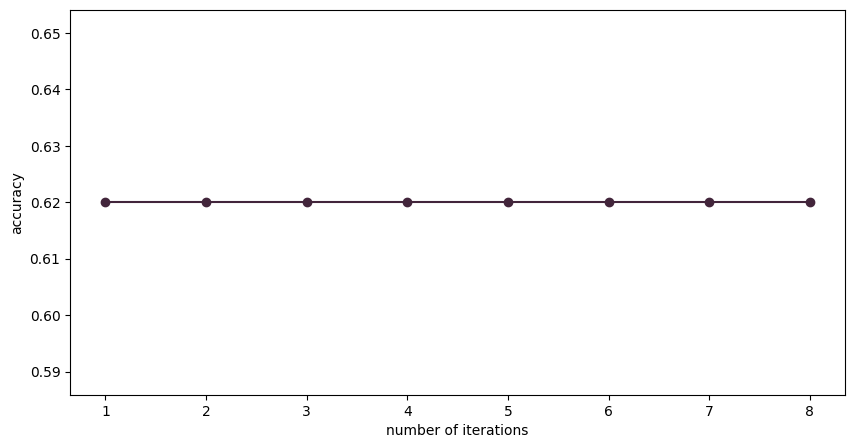

In [34]:
num_iterations= [1,2,3,4,5,6,7,8]
plt.figure( figsize = ( 10 , 5 ) )
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
# Accuracy scores plot obtained from above iterations
plt.plot(num_iterations, accuracy_list, label = 'Accuracy', marker = 'o', color = '#42253B')

In [35]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Create a Perceptron instance and fit the training data
clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_PM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_PM)
print(classification_report(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1]
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.38      0.16      0.22        19
           1       0.62      0.84      0.71        31

    accuracy                           0.58        50
   macro avg       0.50      0.50      0.47        50
weighted avg       0.53      0.58      0.53        50



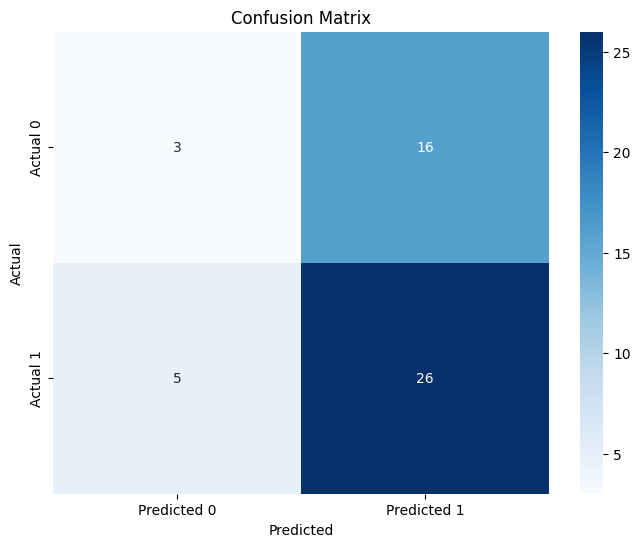

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cost after iteration 0: 0.6930876053013411
Cost after iteration 100: 0.6895859550555832
Cost after iteration 200: 0.6878801311940036
Cost after iteration 300: 0.6865257910990482
Cost after iteration 400: 0.685277606806531
Cost after iteration 500: 0.6840919647409279
Cost after iteration 600: 0.6829594147000445
Cost after iteration 700: 0.6818763851746179
Cost after iteration 800: 0.6808403923040193
Cost after iteration 900: 0.6798492244969918
 [0.6930876053013411, 0.6930288334170791, 0.6929708508194489, 0.6929136436690542, 0.6928571983704758, 0.6928015015680076, 0.6927465401414636, 0.6926923012020606, 0.6926387720883672, 0.6925859403623246, 0.6925337938053334, 0.6924823204144116, 0.6924315083984122, 0.6923813461743129, 0.6923318223635627, 0.6922829257884979, 0.6922346454688141, 0.6921869706181023, 0.6921398906404451, 0.6920933951270688, 0.6920474738530565, 0.6920021167741153, 0.6919573140234018, 0.6919130559084016, 0.6918693329078613, 0.691826135668777, 0.6917834550034323, 0.6917412818

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Importing logistic regression function from scikit learn directly

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_LR)
print(classification_report(y_test, y_pred))

[1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0]
Accuracy is: 0.54
              precision    recall  f1-score   support

           0       0.44      0.79      0.57        19
           1       0.75      0.39      0.51        31

    accuracy                           0.54        50
   macro avg       0.60      0.59      0.54        50
weighted avg       0.63      0.54      0.53        50



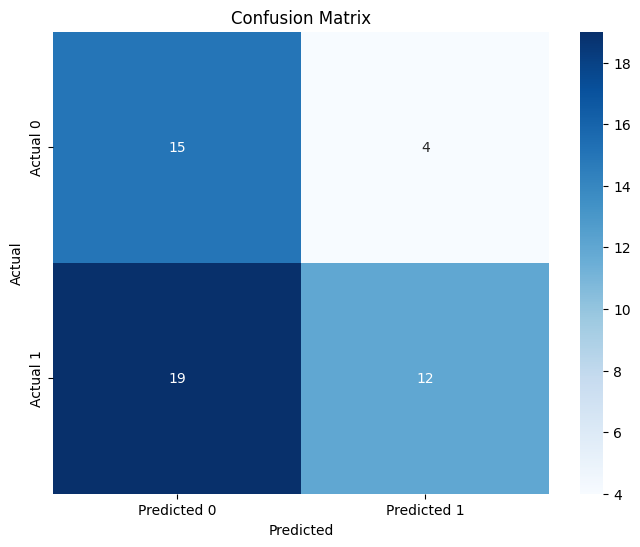

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

[1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0]
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.40      0.63      0.49        19
           1       0.65      0.42      0.51        31

    accuracy                           0.50        50
   macro avg       0.53      0.53      0.50        50
weighted avg       0.56      0.50      0.50        50



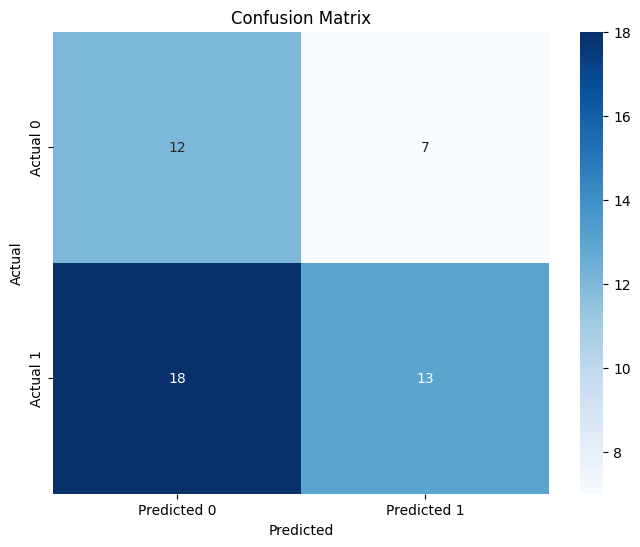

In [42]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))

[1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1]
Accuracy is : 0.38
              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.70      0.61      0.66        31

    accuracy                           0.60        50
   macro avg       0.59      0.60      0.59        50
weighted avg       0.62      0.60      0.61        50



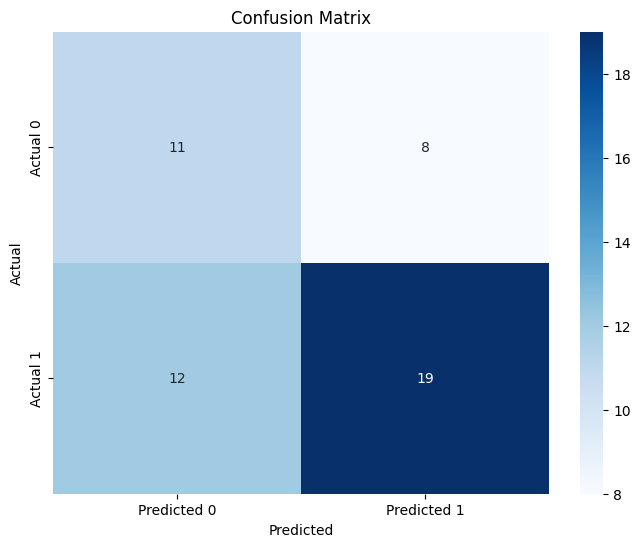

In [44]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.utils import resample
# Define the machine learning model
model = LogisticRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_lgr.append(score)

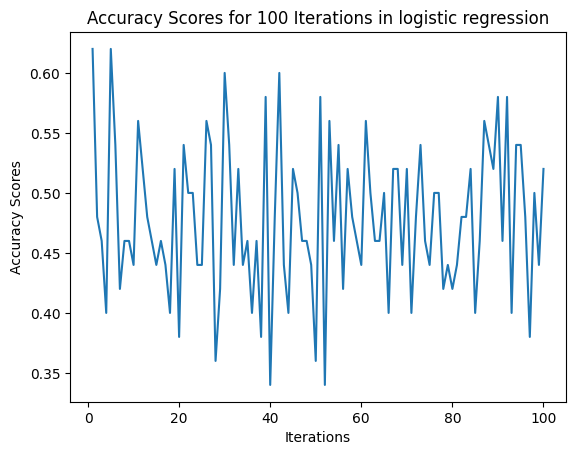

In [46]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in logistic regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [47]:
# Calculate the confidence interval in logistic regression
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_lgr, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_lgr, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_lgr)
std_accuracy = np.std(scores_lgr)

print(f"Mean Accuracy(logistic regression): {mean_accuracy:.2f}")
print(f"Standard Deviation(logistic regression): {std_accuracy:.2f}")

95.0 confidence interval 36.0% and 60.0%
Mean Accuracy(logistic regression): 0.48
Standard Deviation(logistic regression): 0.06


In [48]:
from sklearn.utils import resample
# Define the machine learning model
model = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_per = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_per.append(score)

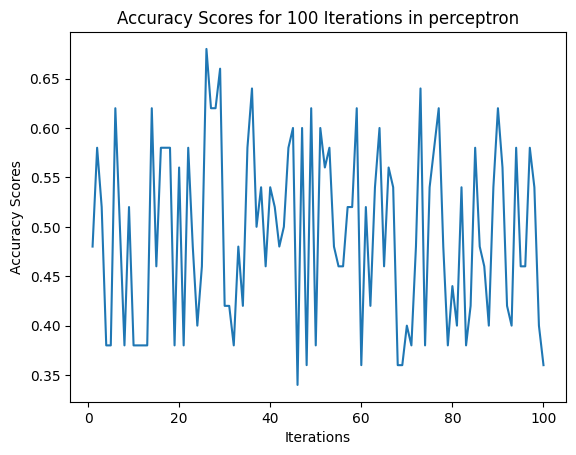

In [49]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_per)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in perceptron")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [50]:
# Calculate the confidence interval in Perceptron model
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_per, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_per, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_per)
std_accuracy = np.std(scores_per)

print(f"Mean Accuracy(perceptron model): {mean_accuracy:.2f}")
print(f"Standard Deviation(perceptron model): {std_accuracy:.2f}")

95.0 confidence interval 36.0% and 64.0%
Mean Accuracy(perceptron model): 0.49
Standard Deviation(perceptron model): 0.09


In [51]:
from sklearn.utils import resample
# Define the machine learning model
model = SVC(kernel='linear', C=1, random_state=42)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_svc= list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_svc.append(score)

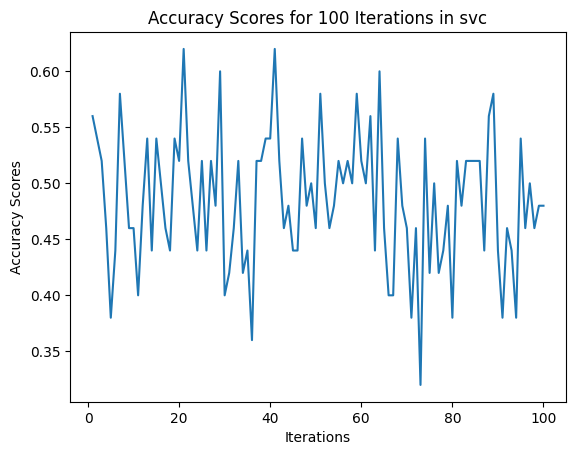

In [52]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_svc)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in svc")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [53]:
# Calculate the confidence interval in a SVM
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_svc, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_svc, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_svc)
std_accuracy = np.std(scores_svc)

print(f"Mean Accuracy(svm classifier): {mean_accuracy:.2f}")
print(f"Standard Deviation(svm classifier): {std_accuracy:.2f}")

95.0 confidence interval 38.0% and 60.0%
Mean Accuracy(svm classifier): 0.48
Standard Deviation(svm classifier): 0.06


In [54]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsClassifier(n_neighbors=3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_knn = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_knn.append(score)

In [55]:
# Calculate the confidence interval IN KNN CLASSIFICATION
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_knn, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_knn, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_knn)
std_accuracy = np.std(scores_knn)

print(f"Mean Accuracy(knn classifier): {mean_accuracy:.2f}")
print(f"Standard Deviation(knn classifier): {std_accuracy:.2f}")


95.0 confidence interval 41.0% and 62.0%
Mean Accuracy(knn classifier): 0.52
Standard Deviation(knn classifier): 0.05


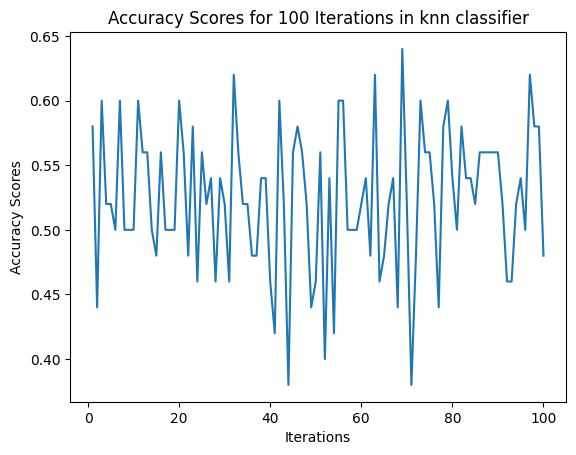

In [56]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_knn)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in knn classifier")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

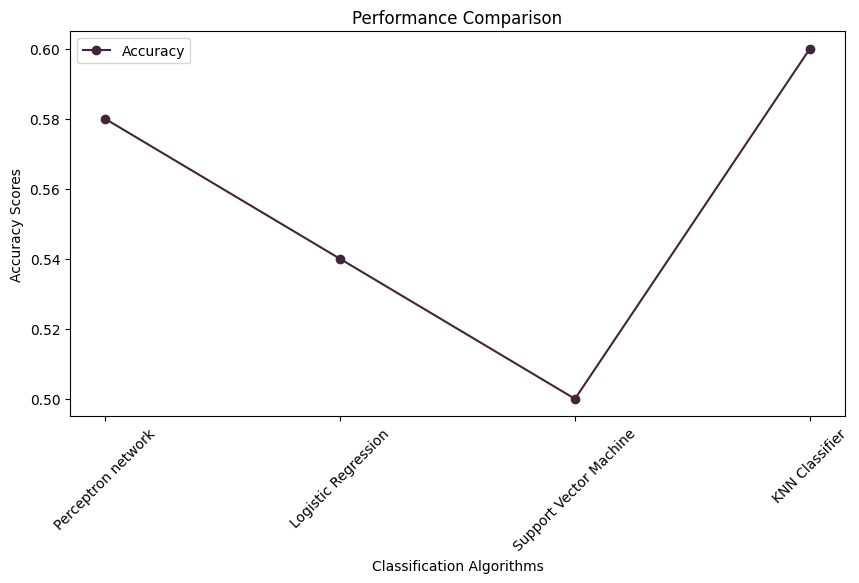

In [57]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine','KNN Classifier']
accuracy_scores = [ accuracy_PM , accuracy_LR , accuracy_SVM,accuracy_KNN ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show()


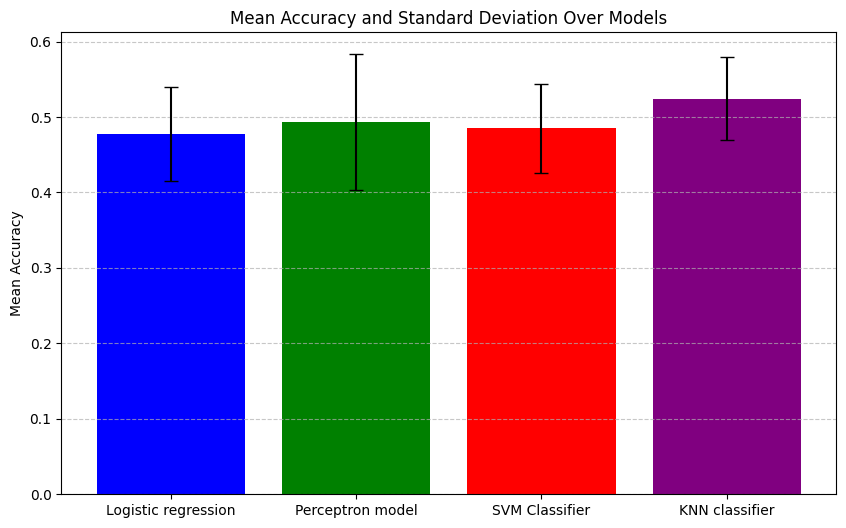

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Logistic regression', 'Perceptron model', 'SVM Classifier','KNN classifier']

# Calculate the mean and standard deviation for each model's accuracy scores
mean_scores = [np.mean(scores) for scores in [scores_lgr, scores_per,scores_svc,scores_knn]]
std_scores = [np.std(scores) for scores in [scores_lgr,scores_per,scores_svc,scores_knn]]

# Plot the mean accuracy scores over models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color=['blue', 'green', 'red','purple'])
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy and Standard Deviation Over Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [59]:
most_fluctuating_model = model_names[np.argmax(std_scores)]
most_consistent_model = model_names[np.argmin(std_scores)]

print(f"Most Fluctuating Model: {most_fluctuating_model}")
print(f"Most Consistent Model: {most_consistent_model}")

Most Fluctuating Model: Perceptron model
Most Consistent Model: KNN classifier
